# Wonderland Jupyter-Notebook

## ( KOMPAKT )

Parameter

In [1]:
# Geburtenrate
BETA1 = 0.04; BETA2 = 1.375; BETA = 0.16

In [2]:
# Sterberate
ALPHA = 0.18; DELTA1 = 0.01; DELTA2 = 2.5; DELTA3 = 4.0; THETA = 15.0

In [3]:
# Wirtschaft
GAMMA = 0.02; ETA = 0.1; LAMBDA = 2.0

In [4]:
# Umwelt
KAPPA = 2.0; EPSILON = 0.02; DELTA = 1.0; RHO = 2.0; OMEGA = 0.1; NY = 1.0

In [5]:
# Umweltschutz
PHI = 0.5; MY = 2.0

In [13]:
# Technologie
CHI = 0.01

Funktionen

In [29]:
from math import exp

def technologie(p):
    return p*(1.0-CHI)

def wirtschaft(y,z):
    return y*(1.0+GAMMA-(GAMMA+ETA)*(1.0-z)**LAMBDA)

def population(x,y,z):
    return x*(1.0+geburtenrate(y,z)-sterberate(y,z))

def geburtenrate(y,z):
    e = e_y_strich(BETA,y,z)
    return BETA1 * (BETA2 - e/(1.0+e))

def sterberate(y,z):
    e = e_y_strich(ALPHA,y,z)
    return DELTA1 * (DELTA2 - e/(1.0+e)) * (1.0 + DELTA3 * (1.0-z)**THETA)

def e_y_strich(CONST,y,z):
    return exp(CONST * (y - umweltschutz(y,z)))

def umwelt(x,y,z,p):
    g = exp(DELTA*z**RHO - OMEGA*fluss_emissionen(x,y,z,p))
    return z * (1 + NY * g - z*g + z - 1)

def fluss_emissionen(x,y,z,p):
    e = exp(EPSILON * umweltschutz(y,z) * x)
    return x*y*p - KAPPA * (e/(1.0+e) - 0.5)

def umweltschutz(y,z):
    return PHI * (1.0-z)**MY * y

Ausgangszustand

In [30]:
x_0 = y_0 = p_0 = 1.0
z_0 = 0.98

Simulationsfunktion

In [31]:
def simulation(years=300):
    res = [(x_0, y_0, z_0, p_0)]
    for year in range(1, years, 1): # 300 Jahre
        # Zustand zum Zeitpunkt t entpacken
        x_t, y_t, z_t, p_t = res[-1]
        # Berechnung des Zustands in t+1
        x_neu = population(x_t, y_t, z_t)
        y_neu = wirtschaft(y_t, z_t)
        z_neu = umwelt(x_t, y_t, z_t, p_t)
        p_neu = technologie(p_t)
        # Initialisierung des Zustand-Tupels in t+1
        zustand_neu = (x_neu, y_neu, z_neu, p_neu)
        # Speicherung des neuen Zustands
        res.append(zustand_neu)
    return res

Matplotlib ...

In [32]:
import matplotlib.pyplot as plt

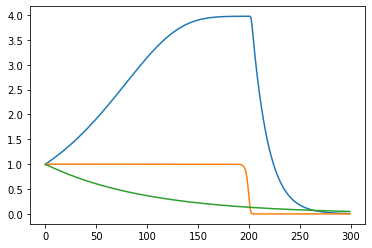

In [33]:
plt.plot([(x,z,p) for x,y,z,p in simulation()])